<a href="https://colab.research.google.com/github/utkarshg1/Test12/blob/main/Binary_Classification_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary Classification with keras
booking status is cancelled or not

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Step 1 - Data ingestion

In [2]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_train.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_train.csv


In [3]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


# booking_status is target feature

# Step 2 - Perform basic data quality checks

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isna().sum()

,0
id,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

# Step 3 - Seperate X and Y(booking_status)

In [7]:
X = df.drop(columns = ["id", "booking_status"])
Y = df["booking_status"]

In [8]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [9]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


# Step 4 - Apply Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [11]:
xtrain.shape

(33680, 17)

In [12]:
xtest.shape

(8420, 17)

# Prerprocess the data

In [15]:
xtrain.dtypes

,0
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,int64
required_car_parking_space,int64
room_type_reserved,int64
lead_time,int64
arrival_year,int64
arrival_month,int64


In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [17]:
num_pipe = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler()
).set_output(transform = "pandas")

In [18]:
num_pipe.fit(xtrain)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [19]:
xtrain_pre = num_pipe.transform(xtrain)
xtrain_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.153093,-0.315818,-0.998671,0.419484,-0.406750,-0.161392,0.690057,-0.480324,0.408029,1.205109,-1.562259,-1.150637,-0.174567,-0.060488,-0.102027,-1.202736,1.839049
32783,0.153093,-0.315818,0.130180,1.118381,-0.406750,-0.161392,0.690057,-0.381869,0.408029,1.558639,1.133508,0.429202,-0.174567,-0.060488,-0.102027,0.188230,0.550609
11797,2.050146,-0.315818,-0.998671,0.419484,-0.406750,-0.161392,0.690057,-0.283413,0.408029,0.498049,-0.888317,0.429202,-0.174567,-0.060488,-0.102027,1.716675,-0.737831
39750,0.153093,-0.315818,-0.998671,-0.978311,3.001047,-0.161392,-0.516146,1.439556,0.408029,0.144519,-0.439023,-1.150637,-0.174567,-0.060488,-0.102027,0.279883,0.550609
28711,0.153093,-0.315818,1.259031,0.419484,-0.406750,-0.161392,0.690057,-0.111116,0.408029,0.851579,-1.000641,0.429202,-0.174567,-0.060488,-0.102027,0.746234,-0.737831


In [20]:
xtest_pre = num_pipe.transform(xtest)
xtest_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.153093,-0.315818,-0.998671,0.419484,-0.40675,-0.161392,-0.516146,-0.566473,0.408029,-2.330190,1.133508,-1.150637,-0.174567,-0.060488,-0.102027,-0.645541,0.550609
38340,0.153093,-0.315818,-0.998671,-0.279414,-0.40675,-0.161392,-0.516146,1.476477,0.408029,0.144519,-1.562259,0.429202,-0.174567,-0.060488,-0.102027,-0.287286,-0.737831
7104,0.153093,-0.315818,1.259031,-0.978311,-0.40675,-0.161392,4.308664,-0.554166,0.408029,-1.623131,1.021184,0.429202,-0.174567,-0.060488,-0.102027,0.000881,-0.737831
36898,0.153093,1.902482,1.259031,1.118381,-0.40675,-0.161392,-0.516146,-0.566473,0.408029,1.205109,-0.551346,0.429202,-0.174567,-0.060488,-0.102027,0.540554,3.127489
9747,0.153093,-0.315818,1.259031,0.419484,-0.40675,-0.161392,-0.516146,0.504230,0.408029,-1.269601,1.582802,0.429202,-0.174567,-0.060488,-0.102027,-0.368426,0.550609


# Step 5 - Building the neural network

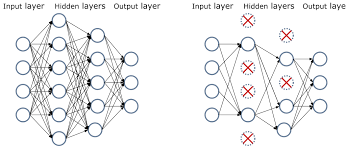

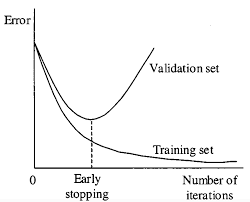

In [21]:
xtrain_pre.shape

(33680, 17)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
model = Sequential(
    [
        Input(shape = (xtrain_pre.shape[1],)),
        Dense(32, activation = "relu"),
        Dropout(0.3),
        Dense(16, activation = "relu"),
        Dropout(0.2),
        Dense(1, activation = "sigmoid")
    ]
)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [25]:
es = EarlyStopping(patience=5, restore_best_weights=True)

In [26]:
hist = model.fit(xtrain_pre, ytrain, validation_split=0.2, epochs=100, callbacks = [es])

Epoch 1/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6777 - loss: 0.5818 - val_accuracy: 0.7726 - val_loss: 0.4797
Epoch 2/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7608 - loss: 0.4961 - val_accuracy: 0.7736 - val_loss: 0.4748
Epoch 3/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7688 - loss: 0.4872 - val_accuracy: 0.7789 - val_loss: 0.4700
Epoch 4/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7721 - loss: 0.4843 - val_accuracy: 0.7807 - val_loss: 0.4678
Epoch 5/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7797 - loss: 0.4686 - val_accuracy: 0.7812 - val_loss: 0.4652
Epoch 6/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7802 - loss: 0.4696 - val_accuracy: 0.7856 - val_loss: 0.4635
Epoch 7/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7822 - loss: 0.4629 - val_accuracy: 0.7856 - val_loss: 0.4619
Epoch 8/100
842/842 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7823 - loss: 0.4686 - val_accu

# Plot the learning curve

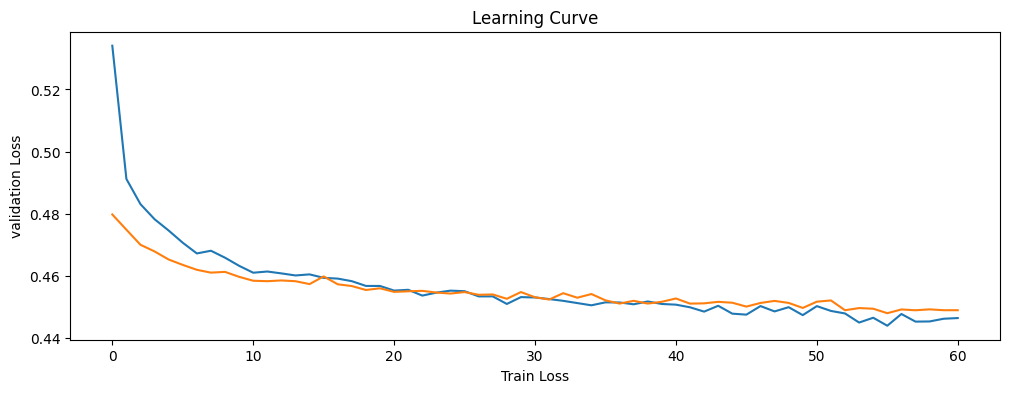

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.title("Learning Curve")
plt.xlabel("Train Loss")
plt.ylabel("validation Loss")
plt.show()

# Evaluate the model

In [29]:
train_loss, train_acc = model.evaluate(xtrain_pre, ytrain)
print(f"Train Loss : {train_loss:.4f}")
print(f"Train Accuracy : {train_acc:.4f}")

1053/1053 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8049 - loss: 0.4294
Train Loss : 0.4311
Train Accuracy : 0.8048


In [30]:
test_loss, test_acc = model.evaluate(xtest_pre, ytest)
print(f"Test Loss : {test_loss:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")

264/264 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8016 - loss: 0.4382
Test Loss : 0.4342
Test Accuracy : 0.8017


In [31]:
yprob_test = model.predict(xtest_pre)
yprob_test[0:5]

264/264 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


array([[0.04396747],
       [0.8776646 ],
       [0.43300262],
       [0.02201435],
       [0.1896751 ]], dtype=float32)

In [32]:
ypred_test = [1 if prob >= 0.5 else 0 for prob in yprob_test]
ypred_test[0:5]

[0, 1, 0, 0, 0]

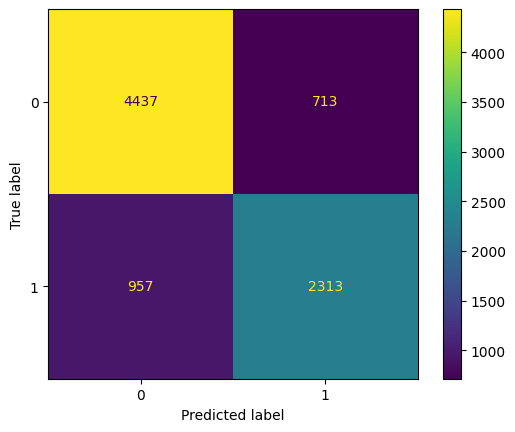

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      5150
           1       0.76      0.71      0.73      3270

    accuracy                           0.80      8420
   macro avg       0.79      0.78      0.79      8420
weighted avg       0.80      0.80      0.80      8420



# Out of sample prediction

In [36]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_test.csv"
print(url2)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/booking_test.csv


In [37]:
xnew = pd.read_csv(url2)
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [39]:
xnew2 = xnew.drop(columns = ["id"])

In [40]:
xnew_pre = num_pipe.transform(xnew2)
xnew_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.050146,-0.315818,0.130180,1.118381,-0.406750,-0.161392,0.690057,0.085794,0.408029,1.558639,-1.225288,0.429202,-0.174567,-0.060488,-0.102027,0.296057,1.839049
1,0.153093,-0.315818,-0.998671,0.419484,-0.406750,-0.161392,-0.516146,-1.009522,-2.450806,0.851579,0.571890,-1.150637,-0.174567,-0.060488,-0.102027,-0.528818,-0.737831
2,0.153093,4.120782,-0.998671,-0.978311,-0.406750,-0.161392,3.102462,-1.058750,0.408029,0.144519,-0.663670,0.429202,-0.174567,-0.060488,-0.102027,3.649470,0.550609
3,0.153093,-0.315818,-0.998671,0.419484,-0.406750,-0.161392,-0.516146,-0.197265,0.408029,-0.916071,1.582802,-1.150637,-0.174567,-0.060488,-0.102027,-0.643384,-0.737831
4,-1.743959,-0.315818,-0.998671,-0.279414,3.001047,-0.161392,-0.516146,-1.194126,0.408029,0.498049,0.571890,0.429202,-0.174567,-0.060488,-0.102027,1.061627,-0.737831


In [42]:
probs = model.predict(xnew_pre)
probs[0:5]

878/878 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.09358905],
       [0.04563928],
       [0.33811882],
       [0.19319047],
       [0.59125304]], dtype=float32)

In [43]:
preds = [1 if p >= 0.5 else 0 for p in probs]
preds[0:5]

[0, 0, 0, 0, 1]

In [44]:
res = xnew[["id"]]
res

,id
0,42100
1,42101
2,42102
3,42103
4,42104
...,...
28063,70163
28064,70164
28065,70165
28066,70166


In [45]:
res["loan_status"] = preds
res["prob"] = probs.round(4)

In [46]:
res.to_csv("Loan_pred.csv", index=False)